In [1]:
import pandas as pd
import os, datetime as dt
import csv
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Creating a pandas dataframe from csv file keeping only the columns in usecols list
file = r'C:\CodingInPython\Demo\resources\CovidData_Michigan.csv'
df = pd.read_csv(file, usecols = ['date','deathIncrease'])

df.head()


,date,deathIncrease
0,2021-01-16,119
1,2021-01-15,39
2,2021-01-14,175
3,2021-01-13,40
4,2021-01-12,104


In [5]:
# Renaming the columns as needed by mapping
mapping = {df.columns[0]:'Date', df.columns[1]: 'DeathIncreased'}
df = df.rename(columns=mapping)

df.head()


,Date,DeathIncreased
0,2021-01-16,119
1,2021-01-15,39
2,2021-01-14,175
3,2021-01-13,40
4,2021-01-12,104


In [6]:
# COnverting Date filed from object to proper pandas datetime object and assiging to Month column
df['Month'] = pd.to_datetime(df['Date'])

df.head()


,Date,DeathIncreased,Month
0,2021-01-16,119,2021-01-16
1,2021-01-15,39,2021-01-15
2,2021-01-14,175,2021-01-14
3,2021-01-13,40,2021-01-13
4,2021-01-12,104,2021-01-12


In [7]:
# Merging DeathIncreased column as per month 
grouped = df.groupby(df['Month'].dt.strftime('%B'))['DeathIncreased'].sum()
grouped = grouped.reset_index()
grouped.columns=np.where(grouped.columns==0, 'DeathIncreased', grouped.columns) #replace the default 0 to 'count'

grouped.head()


,Month,DeathIncreased
0,April,3883
1,August,303
2,December,3454
3,January,1651
4,July,257


In [15]:
# Setting mont as index
grouped = grouped.set_index('Month')

grouped


,DeathIncreased
Month,
April,3883
August,303
December,3454
January,1651
July,257
June,375
March,551
May,1384
November,1865


In [23]:
# Creating a pandas dataframe from umeployment csv file and setting month as index
unempdf = pd.read_csv(r'C:\CodingInPython\Demo\resources\Unemployment_New.csv', index_col='Month')

unempdf.head()


,UnEMPL
Month,
January,4946724
February,4950186
March,4902508
April,4591520
May,4762541


In [24]:
# Merging two dataframe into one based on common Month index
result = grouped.merge(unempdf, left_index=True, right_index=True)

result


,DeathIncreased,UnEMPL
Month,,
April,3883,4591520
August,303,4914058
January,1651,4946724
July,257,4816641
June,375,4943134
March,551,4902508
May,1384,4762541
November,1865,4922791
October,616,4893265


In [25]:
result ['UnEmpl1000'] = result['UnEMPL']/1000

result


,DeathIncreased,UnEMPL,UnEmpl1000
Month,,,
April,3883,4591520,4591.520
August,303,4914058,4914.058
January,1651,4946724,4946.724
July,257,4816641,4816.641
June,375,4943134,4943.134
March,551,4902508,4902.508
May,1384,4762541,4762.541
November,1865,4922791,4922.791
October,616,4893265,4893.265


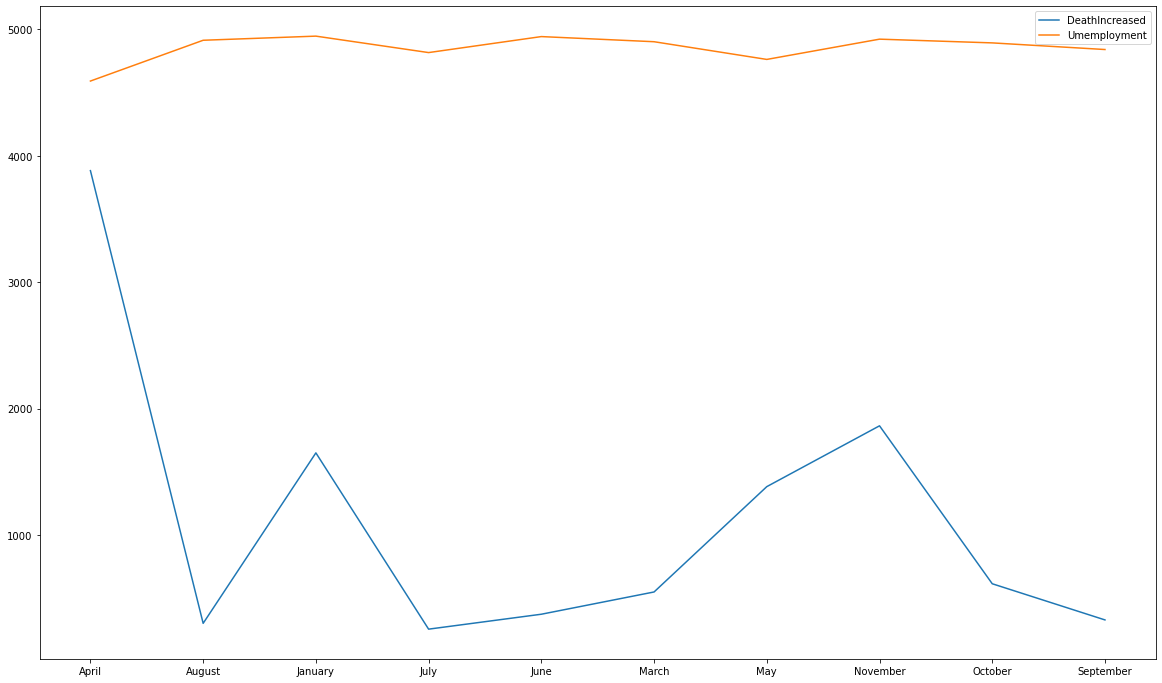

In [34]:
# Ploting data
plt.figure(figsize=(20,12))
plt.plot(result.index, result['DeathIncreased'], label='DeathIncreased')
plt.plot(result.index, result['UnEmpl1000'], label='Umemployment')
# add car sales data as well
#plt.plot(result.index, result['UnEmpl1000'], label='Umemployment')

# Add a legend
plt.legend()

# Show the plot
plt.show()
